In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from pandas_profiling import ProfileReport
import numpy as np

C:\Users\user\AppData\Local\Temp\ipykernel_16072\4240260412.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv('instagram_reach.csv')

In [3]:
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [4]:
df.corr()

,Unnamed: 0,S.No,Followers,Likes
Unnamed: 0,1.000000,0.869163,0.208473,0.010271
S.No,0.869163,1.000000,0.172002,0.009721
Followers,0.208473,0.172002,1.000000,0.266218
Likes,0.010271,0.009721,0.266218,1.000000


In [5]:
df.drop(labels=['Unnamed: 0','S.No'], axis=1 , inplace= True)

In [6]:
df[df.duplicated()]

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes


In [7]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [8]:
df.describe()

,Followers,Likes
count,100.00000,100.00000
mean,961.96000,46.48000
std,1014.62567,55.08698
min,11.00000,8.00000
25%,252.75000,19.00000
50%,612.00000,29.00000
75%,1197.00000,46.00000
max,4496.00000,349.00000


In [9]:
df.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [10]:
df.dropna()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [11]:
df['Caption']

0     Who are #DataScientist and what do they do? >>...
1     We all know where it’s going. We just have to ...
2     Alexander Barinov: 4 years as CFO in multinati...
3                                                  sfad
4     Ever missed a call while your phone was chargi...
                            ...                        
95    328 S. Wetherly Drive, Beverly Hills, CA 90212...
96    Credit @tristankappel To find more dvlp follow...
97    We are coming up with the Best 21 Books that w...
98    We’re only paid to move dirt once. It’s not ju...
99                      Obtén tu tienda en línea ahora.
Name: Caption, Length: 100, dtype: object

C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8217 (\N{RIGHT SINGLE QUOTATION MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8211 (\N{EN DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8232 (\N{LINE SEPARATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128534 (\N{CONFOUNDED FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\I

C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128525 (\N{SMILING FACE WITH HEART-SHAPED EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_

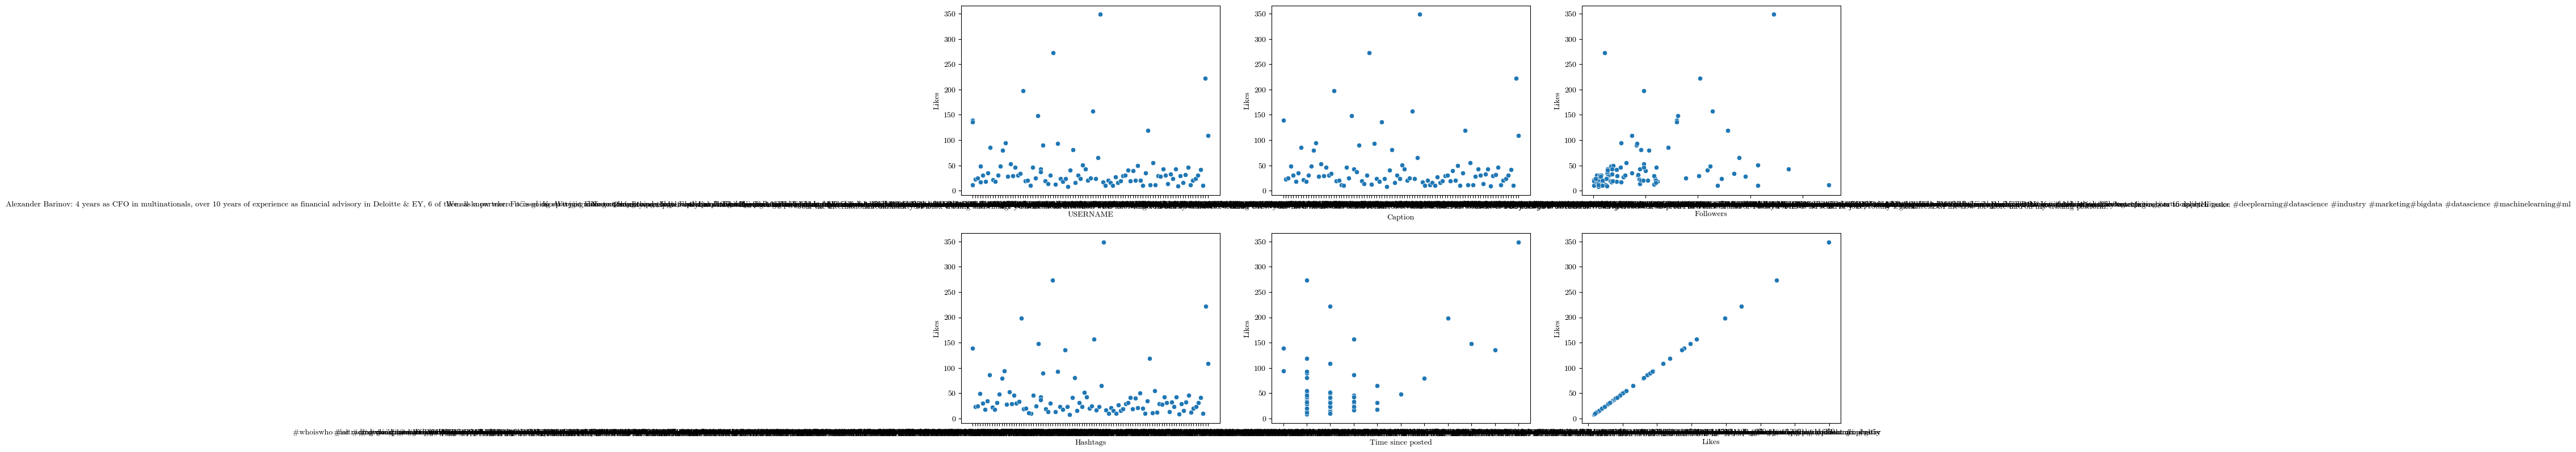

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plot

mpl.rc('font',family = 'serif', serif = 'cmr10')
import seaborn as sns
# let's check how our features are related to the target column
plot.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in df.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.scatterplot(x=df[column], y=df['Likes'])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

In [13]:
# import pandas_profiling as pp

# pp.ProfileReport(df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [15]:
df['Caption']

0     Who are #DataScientist and what do they do? >>...
1     We all know where it’s going. We just have to ...
2     Alexander Barinov: 4 years as CFO in multinati...
3                                                  sfad
4     Ever missed a call while your phone was chargi...
                            ...                        
95    328 S. Wetherly Drive, Beverly Hills, CA 90212...
96    Credit @tristankappel To find more dvlp follow...
97    We are coming up with the Best 21 Books that w...
98    We’re only paid to move dirt once. It’s not ju...
99                      Obtén tu tienda en línea ahora.
Name: Caption, Length: 100, dtype: object

In [16]:
df['Time since posted'] = df['Time since posted'].str.split(' ').str[0]

In [17]:
df['Likes'].unique()

array([139,  23,  25,  49,  30,  18,  35,  86,  22,  31,  48,  80,  94,
        28,  53,  29,  46,  34, 198,  19,  20,  11,  10, 148,  43,  37,
        90,  14, 273,  13,  93,  24, 136,   8,  41,  81,  16,  51, 157,
        17,  65, 349,  21,  27,  40,  50, 119,  55,  12,  33,   9,  32,
        42, 222, 109], dtype=int64)

In [18]:
df['Time since posted'].unique()

array(['11', '2', '3', '4', '7', '8', '9', '5', '20', '14', '24'],
      dtype=object)

In [19]:
df['Time since posted'] = df['Time since posted'].astype('int')

In [20]:
df['Time since posted'].dtypes

dtype('int32')

In [21]:
df2= df.copy()
import seaborn as sns

In [22]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']


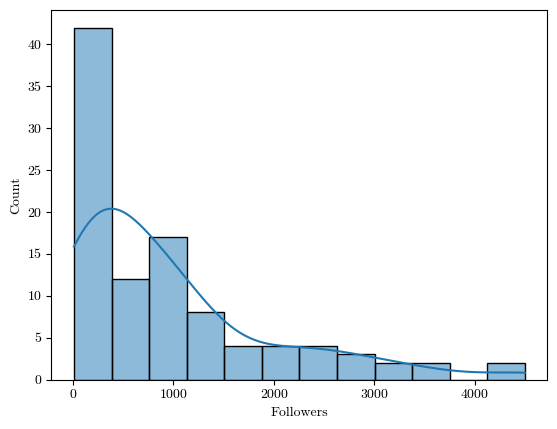

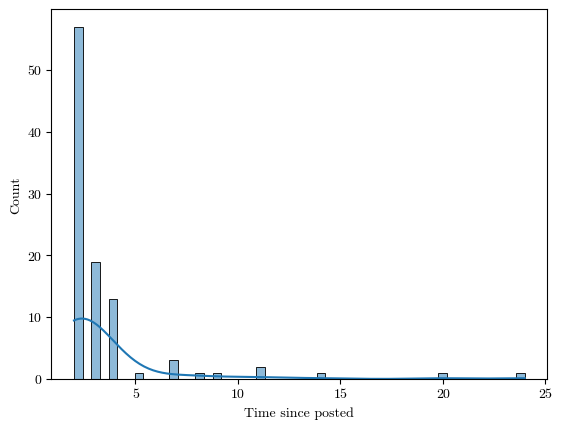

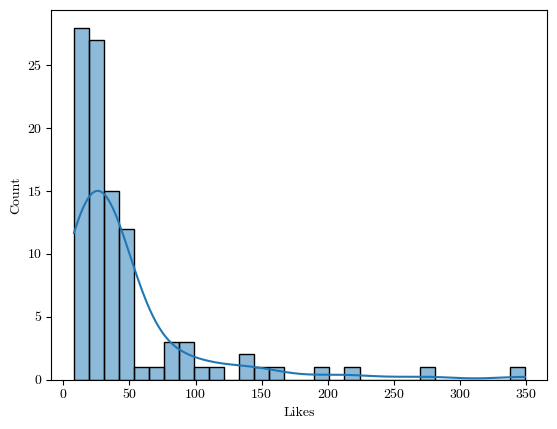

In [23]:
for i in numerical_features:
    sns.histplot(data=df , x=i ,kde=True )
    plt.show()

<AxesSubplot:>

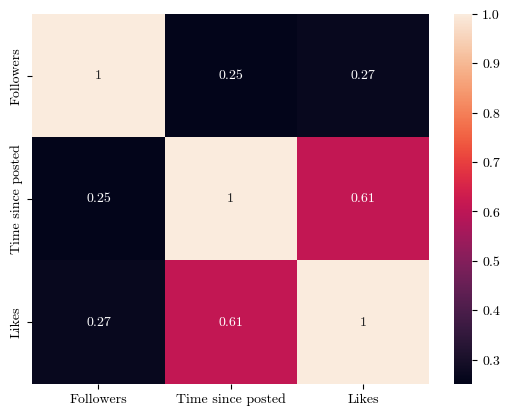

In [24]:
sns.heatmap(df.corr(), annot=True)

In [25]:
#there is no or little correlation so we can procced with the data

In [26]:
categorical_features

['USERNAME', 'Caption', 'Hashtags']

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()  

df['USERNAME']=labelencoder.fit_transform(df['USERNAME'])

df['Caption'].dtypes

dtype('O')

In [28]:
df['Caption']= df['Caption'].apply(lambda x:len(str(x)))

In [29]:
df['Caption']

0     149
1     454
2     704
3       4
4     322
     ... 
95    204
96     79
97    261
98    390
99     31
Name: Caption, Length: 100, dtype: int64

In [30]:
df['new']=0

In [31]:
for i in range(100):
    df['new'][i] = df['Hashtags'][i].count("#")

C:\Users\user\AppData\Local\Temp\ipykernel_16072\2959184653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new'][i] = df['Hashtags'][i].count("#")


In [32]:
df['new']

0      5
1     28
2     30
3     30
4     26
      ..
95    15
96    28
97    29
98    30
99    30
Name: new, Length: 100, dtype: int64

In [33]:
df['Hashtags']

0     #MachineLearning #AI #DataAnalytics #DataScien...
1      #deck .#mac #macintosh#sayhello #apple #steve...
2     #whoiswho #aitrading #ai #aitradingteam#instat...
3     #iot #cre#workplace #CDO #bigdata #technology#...
4     #instamachinelearning #instabigdata#instamarke...
                            ...                        
95    #beverlyhills #realestate#losangelesrealestate...
96    #workspace #work #developer#development #devel...
97    #books #book #motivation #inspiration #life#bo...
98    #heavyequipment #underconstruction#dozer #real...
99    #marketing #programming#development #desarroll...
Name: Hashtags, Length: 100, dtype: object

In [34]:
#To calculate for 'Time since posted'

In [35]:
df.drop(labels='Hashtags',axis=1, inplace = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   USERNAME           100 non-null    int32
 1   Caption            100 non-null    int64
 2   Followers          100 non-null    int64
 3   Time since posted  100 non-null    int32
 4   Likes              100 non-null    int64
 5   new                100 non-null    int64
dtypes: int32(2), int64(4)
memory usage: 4.0 KB


In [37]:
X= df.drop(labels='Likes', axis=1)
Y= df['Likes']

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [39]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test= scaler.transform(X_test)

In [40]:
X_train.shape

(70, 5)

In [41]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import xgboost as xg
from sklearn.ensemble import RandomForestRegressor

In [42]:
from sklearn.model_selection import GridSearchCV 

In [43]:
model = RandomForestRegressor(n_estimators = 10)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [47]:
grid_param={
    'n_estimators':[5,10,15,20,25],
    'max_depth':range(10),
    'min_samples_leaf':range(10)
}

In [48]:
grid_search = GridSearchCV(param_grid= grid_param , estimator= model, cv=10 , n_jobs=10, verbose=1)

In [49]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
950 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\lib\site-packages

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=10), n_jobs=10,
             param_grid={'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 15, 20, 25]},
             verbose=1)

In [50]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 20}

In [52]:
df_best = RandomForestRegressor(
 max_depth=4,
 min_samples_leaf=3,
 n_estimators=20)

In [53]:
df_best.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=3, n_estimators=20)

In [55]:
y_pred = df_best.predict(X_test)

In [56]:
r2_score(y_test,y_pred)

0.06192109073956664